<a href="https://colab.research.google.com/github/pramit46/LLMTry/blob/main/LangGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Langgraph

In [ ]:
!pip install -q langgraph langchain_groq

In [ ]:
from typing import TypedDict, Annotated
import langgraph
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from google.colab import userdata
from langchain_groq import ChatGroq
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

In [ ]:
class TypedStructure(TypedDict):
  #input:str
  #output:str
  #context_len:int
  #context:str
  messages:Annotated[list, add_messages]

In [ ]:
llm=ChatGroq(groq_api_key=userdata.get('groq_api_key'),model_name="Gemma2-9b-It")
print(llm)

In [ ]:
memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)
conversation = ConversationChain(llm=llm, memory=memory, verbose=True)

In [ ]:
def chatbot(ts=TypedStructure):
  return{"messages":llm.invoke(ts["messages"])}

In [ ]:
graph_builder=StateGraph(TypedStructure)

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot", END)
graph=graph_builder.compile()

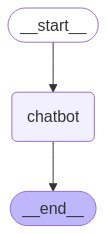

In [ ]:
from IPython.display import display, Image
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
  print(e)

In [ ]:
while True:
    user_input=input("User: ")
    if user_input.lower() in ["exit","q","quit"]:
      break
    for event in graph.stream({'messages':('user', user_input)}):
      #print(event.values())
      for value in event.values():
        print(f"\nAssistant: {value['messages'].content}")


User: who am i

Assistant: As an AI, I don't have access to any personal information about you, including your identity.

To figure out who you are, I suggest reflecting on:

* **Your values and beliefs:** What is important to you? What do you stand for?
* **Your interests and passions:** What do you enjoy doing? What are you curious about?
* **Your relationships:** Who are the important people in your life? What do you value in your relationships?
* **Your experiences:** What has shaped who you are? What have you learned from your life experiences?

Exploring these areas can help you gain a better understanding of yourself.

User: who are you?

Assistant: I am Gemma, an open-weights AI assistant. I am a large language model trained by Google DeepMind.My purpose is to help people by understanding and responding to their requests in a helpful, informative, and comprehensive way.

Here are some key things to know about me:

* **Open-weights:** My weights are publicly available, meaning a